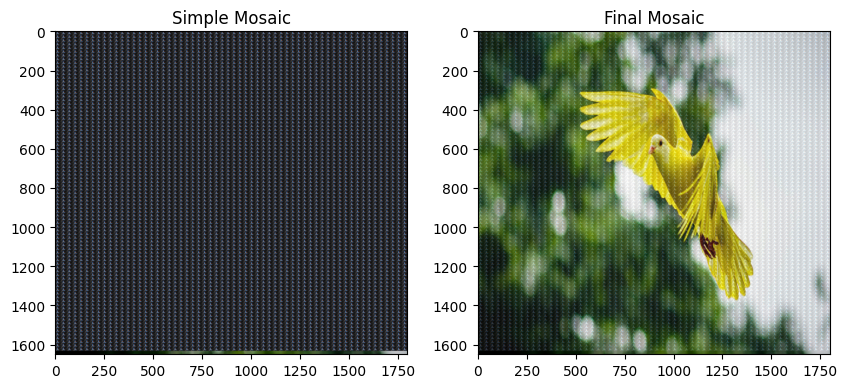

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_mosaic(small_img, big_img):
    h_s, w_s, _ = small_img.shape
    h_b, w_b, _ = big_img.shape

    # Ensure the small image fits within the big image
    if h_s > h_b or w_s > w_b:
        raise ValueError("Error: Small image dimensions must be smaller than big image dimensions.")

    mosaic = big_img.copy()
    simple_mosaic = big_img.copy()

    for i in range(0, h_b - h_s + 1, h_s):
        for j in range(0, w_b - w_s + 1, w_s):
            patch = big_img[i:i+h_s, j:j+w_s]
            if patch.shape == small_img.shape:
                blended_patch = cv2.addWeighted(patch, 0.90, small_img, 0.5, 0)
                mosaic[i:i+h_s, j:j+w_s] = blended_patch
                simple_mosaic[i:i+h_s, j:j+w_s] = small_img

    return mosaic, simple_mosaic

# Load images
img1_path = '/content/bird2.jpg'  # Small image (building block)
img2_path = '/content/bird.jpg'  # Big image

# Ensure images are loaded correctly
small_img = cv2.imread(img1_path)
big_img = cv2.imread(img2_path)

if small_img is None:
    raise FileNotFoundError("Error: 'bird.jpg' not found or failed to load. Check the file path.")
if big_img is None:
    raise FileNotFoundError("Error: 'bird2.jpg' not found or failed to load. Check the file path.")

# Resize big image to 2048x2048 pixels
big_img = cv2.resize(big_img, (1800,1650))

# Resize small image to 30 pixels (keeping aspect ratio)
scale_factor = min(30 / small_img.shape[0], 30 / small_img.shape[1])
small_img = cv2.resize(small_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

# Generate mosaic images
M, simple_mosaic = create_mosaic(small_img, big_img)

# Display images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(simple_mosaic, cv2.COLOR_BGR2RGB))
plt.title('Simple Mosaic')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(M, cv2.COLOR_BGR2RGB))
plt.title('Final Mosaic')
plt.show()

# Save images
cv2.imwrite('simple_mosaic.jpg', simple_mosaic)
cv2.imwrite('mosaic.jpg', M)